In [ ]:
import pandas as pd 

In [ ]:
import seaborn as sns

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# INTRODUCTION

In [ ]:
df = pd.read_csv('/content/billets (1).csv', sep=';', encoding='utf-8')

In [ ]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
df.shape

(1500, 7)

In [ ]:
df.describe()
# on peut voir qu'il y a 37 valeurs manquantes dans la colonne 'margin_low'

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [ ]:
df.duplicated().sum()

0

- Repartition des billets (vrai/faux)

In [ ]:
df.is_genuine.value_counts() # 1000 vrais billets et 500 faux billets

True     1000
False     500
Name: is_genuine, dtype: int64

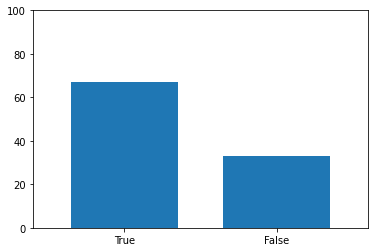

In [ ]:
df['is_genuine'].value_counts(normalize=True).mul(100).round(0).plot(kind='bar', width=0.7)
plt.xticks(np.arange(2), ('True', 'False'),rotation=0)
plt.ylim(0,100)
plt.show()

#Il y a environ 70% de vrais billets et 30% de faux billets

- Répartition des billets par variables : Pairplot







In [ ]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

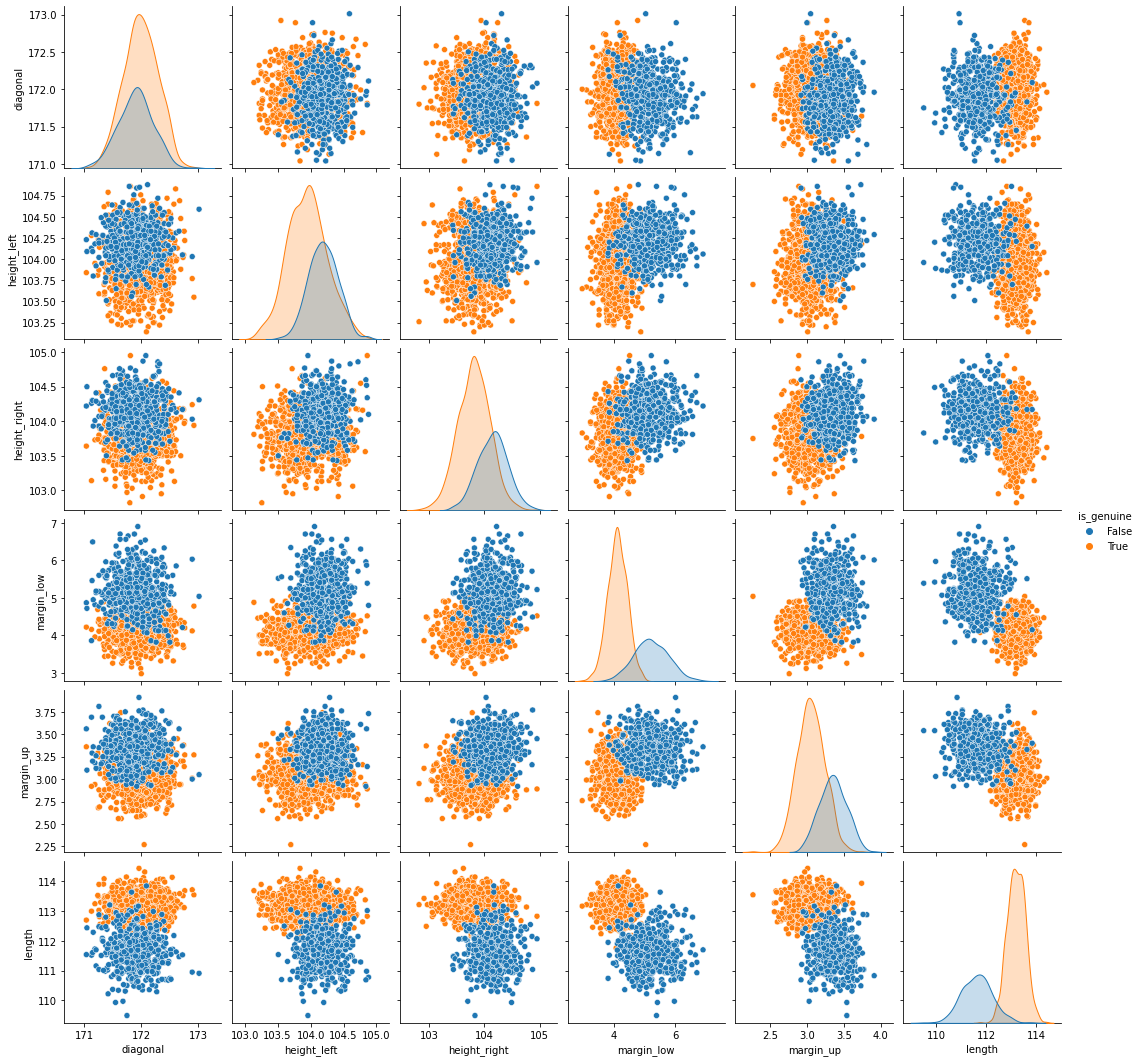

In [ ]:
sns.pairplot(df, hue='is_genuine')
plt.show()

- Corrélations entre les variables 

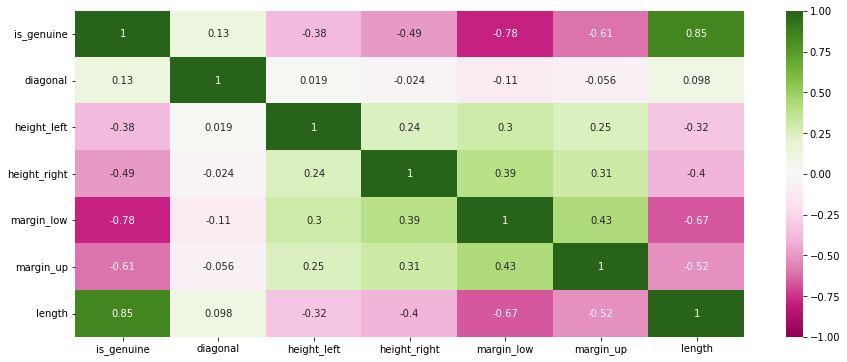

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='PiYG')
plt.show()

# VALEURS MANQUANTES : RÉGRESSION LINÉAIRE

## I / Valeurs Manquantes : Corrélations

- Correlation entre la variable à expliqué ('margin_low') et les autres variables

In [ ]:
pd.DataFrame(df.iloc[:,1:].corr()['margin_low'].sort_values(ascending=True))

,margin_low
length,-0.666753
diagonal,-0.111534
height_left,0.302643
height_right,0.391085
margin_up,0.431606
margin_low,1.000000


- Colinéarité : VIF

In [ ]:
#selection des variables explicatives dans le dataframe de départ
df.iloc[:, [1,2,3,5,6]].columns

Index(['diagonal', 'height_left', 'height_right', 'margin_up', 'length'], dtype='object')

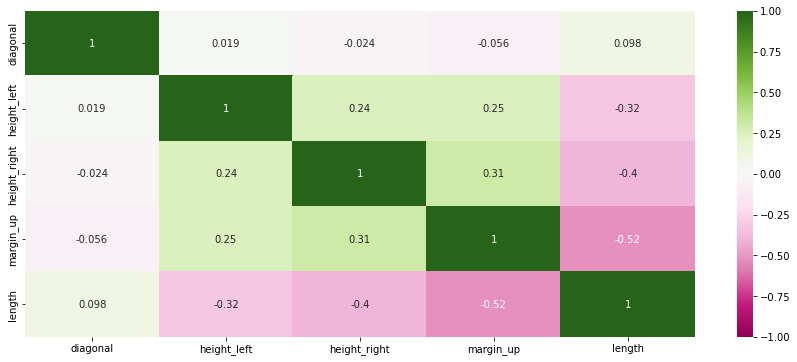

In [ ]:
#matrice des corrélations des variables explicatives : diagonal, height_left height_right, margin_up, length,
fig = plt.figure(figsize=(15,6))
matrice_corrélation = df.iloc[:, [1,2,3,5,6]].corr()
sns.heatmap(matrice_corrélation, vmin=-1, vmax=1, annot=True, cmap='PiYG')
plt.show()

In [ ]:
#Dans un modèle de régression linéaire où l'on veut prédire les valeurs de : margin_low (variable expliquée)
# à partir des varibles explicatives : diagonal, height_left height_right, margin_up, length,
# on vérifie la colinéarité des varibles explicatives avec le VIF

#les valeurs sur la digonale de l'inverse de la matrice de corrélation nous donne les VIF

vif1 = np.linalg.inv(matrice_corrélation)
np.diag(vif1)
pd.DataFrame(np.diag(vif1), index=['diagonal', 'height_left', 'height_right', 'margin_up', 'length'], columns=['VIF'])


,VIF
diagonal,1.012790
height_left,1.145295
height_right,1.229263
margin_up,1.403517
length,1.574765


## II / Régression linéaire

In [ ]:
df.shape

(1500, 7)

In [ ]:
#copie du dataframe de départ puis séléction des varibles quantitatives pour la régression linéaire (on exclu'is_genuine')
df1 = df.copy().iloc[:,1:]
df1.head(3)

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16


In [ ]:
df1.columns

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

- Dataframe avec les valeurs manquantes (isolées)

In [ ]:
#dataframe avec les valeurs manquantes : test_data
test_data = df1[df1.isna().any(axis=1)]
test_data.head(3)

,diagonal,height_left,height_right,margin_low,margin_up,length
72,171.94,103.89,103.45,NaN,3.25,112.79
99,171.93,104.07,104.18,NaN,3.14,113.08
151,172.07,103.80,104.38,NaN,3.02,112.93


In [ ]:
test_data.shape #37 lignes qui correspondent aux 37 valeurs manquantes

(37, 6)

        x_test du dataframe test_data (dataframe avec les valeurs maquantes)


In [ ]:
x_test = test_data[['diagonal', 'height_left', 'height_right','margin_up', 'length']]

- Dataframe sans les valeurs manquantes

In [ ]:
#dataframe sans les valeurs manquantes : train_data
train_data = df1.dropna()
train_data.head(3)

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16


In [ ]:
train_data.shape # (1500-37 valeurs manquantes) 1463 lignes 

(1463, 6)

            y_train et x_train du dataframe train_data (dataframe sans les valeurs maquantes)

In [ ]:
# y_train correspond à la variable expliquée 'margin_low' dans le train set
y_train = train_data['margin_low']

In [ ]:
y_train.shape

(1463,)

In [ ]:
# x_train variables explicatives du train set
x_train = train_data[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]

In [ ]:
x_train.shape

(1463, 5)

- Model de régression linéaire 

In [ ]:
from sklearn.linear_model import LinearRegression

#model de régression(moindre carré ordinaires)
lr = LinearRegression().fit(x_train, y_train)

           Evaluation du modèle 

In [ ]:
from sklearn.metrics import *

#valeurs prédites par le model (données d'entraînement)
y_pred_train = lr.predict(x_train)

#coefficient de détermination ou R2
print('Coefficient de détermination', lr.score(x_train, y_train))

#score précision
print('Score precision', r2_score(y_train, y_pred_train))

print("")

#Mean squared error
print('Erreur Quadratique Moyenne', mean_squared_error(y_train, y_pred_train))

print("")

#mean_absolute_error
print('Erreur Absolue Moyenne', mean_absolute_error(y_train, y_pred_train))

print("")

#median_absolute_error
print('Erreur Absolue Mediane', median_absolute_error(y_train, y_pred_train))

print("")

#constante
print('Contante', lr.intercept_)

print("")
print("")

#coefficients
print(pd.DataFrame(lr.coef_, index=x_train.columns, columns=['Coefficients']))

Coefficient de détermination 0.4773366973063957
Score precision 0.4773366973063957

Erreur Quadratique Moyenne 0.2301526976978418

Erreur Absolue Moyenne 0.3722362700627651

Erreur Absolue Mediane 0.2998959005189441

Contante 22.994842714447834


              Coefficients
diagonal         -0.111060
height_left       0.184122
height_right      0.257138
margin_up         0.256188
length           -0.409103


- Application du modèle de régression linéaire sur le x_test (test_data) et prédiction des valeurs manquantes

In [ ]:
test_data.columns

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [ ]:
#variables explicatives dans le dataframe test_data soit x_test
x_test.columns

Index(['diagonal', 'height_left', 'height_right', 'margin_up', 'length'], dtype='object')

- Application du modèle sur le x_test et prédiction des valeurs manquantes

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([4.31852466, 4.39366755, 4.41045663, 4.31901423, 4.6506171 ,
       3.80330831, 4.17973608, 4.12744154, 4.13503418, 4.16053851,
       4.17742026, 3.76855378, 4.05876385, 4.29804709, 4.16060746,
       4.09406453, 4.43984627, 4.47065037, 4.34164322, 4.08041448,
       3.61430588, 4.37181147, 4.09362068, 4.24962896, 3.89374829,
       3.74633265, 4.23741481, 4.71053287, 4.13778022, 5.05027715,
       4.80214523, 5.067584  , 5.04756967, 4.77896717, 5.726993  ,
       5.18586214, 5.14004269])

In [ ]:
#arrondi des valeurs 2 chiffres après la virgule
y_pred = np.around(y_pred, decimals=2)

In [ ]:
y_pred.shape

(37,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


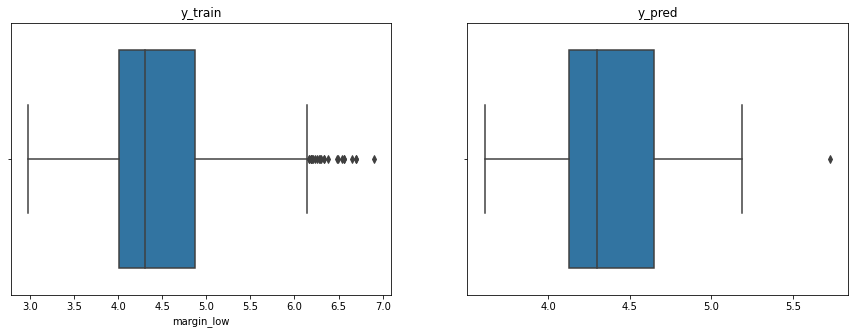

In [ ]:
#boxplot comparaison des valeurs de margin_low dans les données d'entraînement soit y_train, et données test soit y_pred
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(y_train, ax=axes[0]).set_title('y_train')
sns.boxplot(y_pred, ax=axes[1]).set_title('y_pred')

plt.show()

- Remplacement des valeurs manquantes avec les valeurs "prédites" par le modèle

In [ ]:
#selection des valeurs manquantes
df[df['margin_low'].isna()].head(2)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08


In [ ]:
#valeurs "prédites"
y_pred

array([4.32, 4.39, 4.41, 4.32, 4.65, 3.8 , 4.18, 4.13, 4.14, 4.16, 4.18,
       3.77, 4.06, 4.3 , 4.16, 4.09, 4.44, 4.47, 4.34, 4.08, 3.61, 4.37,
       4.09, 4.25, 3.89, 3.75, 4.24, 4.71, 4.14, 5.05, 4.8 , 5.07, 5.05,
       4.78, 5.73, 5.19, 5.14])

In [ ]:
#Remplacement des valeurs manquantes avec les valeurs "prédites"
df.loc[df['margin_low'].isna(), 'margin_low'] = y_pred

In [ ]:
#verification : dataframe avec les valeurs manquantes remplacées
df[(df.index==72) | (df.index==99)]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.32,3.25,112.79
99,True,171.93,104.07,104.18,4.39,3.14,113.08


# ANALYSE EN COMPOSANTES PRINCIPALES

## I/ Normalisation des données

In [ ]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [ ]:
df_var_quanti = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length' ]]

In [ ]:
#normalisation des données 
from sklearn import preprocessing
df_norm = preprocessing.scale(df_var_quanti)
df_norm 

array([[-0.48653957,  2.77412327,  3.16324041,  0.05538173, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08197588, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12659549, -0.91256208,
         0.55190114],
       ...,
       [-0.51931643, -0.06524991,  0.61346228,  1.55669379,  0.89984645,
        -0.83501554],
       [ 0.3328817 ,  0.83666863,  0.42914097,  1.04109167,  1.33137229,
        -0.4911519 ],
       [-1.6009525 ,  0.40241156, -0.30814427,  0.22219418,  0.94299904,
        -0.69747008]])

## II/ Outliers

In [ ]:
#données normalisées sous forme de dataframe
df1 = pd.DataFrame(df_norm, index=df_var_quanti.index, columns=df_var_quanti.columns)

In [ ]:
#liste des index pour lesquels le zscore >=3
list1 = df1.where(df1>=3).isnull().sum(axis=1).sort_values().reset_index().head(16)['index'].to_list()

In [ ]:
#liste des index pour lesquesls le zscore <=3
list2 = df1.where(df1<=-3).isnull().sum(axis=1).sort_values().reset_index().head(8)['index'].to_list()

In [ ]:
#liste des index outliers
list = list1+list2
list

[0,
 828,
 842,
 1022,
 1027,
 1029,
 1041,
 1110,
 1169,
 1254,
 1277,
 1290,
 1441,
 1464,
 1124,
 1484,
 1453,
 729,
 251,
 1082,
 664,
 522,
 1142,
 1355]

- nouveaux dataframes sans les outliers

In [ ]:
#dataframe de départ avec variable qualitative et les variables quantitatives
df = df[~df.index.isin(list)]

In [ ]:
#dataframe avec seulement les variables quantitatives
df_var_quanti = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length' ]]

In [ ]:
#normalisation des données avec le nouveau dataframe, après suppression des outliers
from sklearn import preprocessing
df_norm = preprocessing.scale(df_var_quanti)
df_norm 

array([[-1.66315663, -2.23899172, -0.80199017, -1.09161329, -0.69639027,
         0.4626466 ],
       [ 2.43698676,  1.51108122, -1.30011757, -0.10306663, -0.91408597,
         0.54409813],
       [-1.99650162, -0.39743804,  0.06973277, -1.32698154, -0.60931199,
         0.9513558 ],
       ...,
       [-0.52978366, -0.0626101 ,  0.6301261 ,  1.63865843,  0.91455794,
        -0.86384979],
       [ 0.33691332,  0.84142534,  0.44332832,  1.10515706,  1.34994935,
        -0.5147718 ],
       [-1.62982213,  0.40614901, -0.30386278,  0.25783136,  0.95809708,
        -0.7242186 ]])

## III/ Analyse en composantes principales

- Composantes principales

In [ ]:
from sklearn import decomposition

In [ ]:
df_var_quanti.columns

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [ ]:
#autant de composantes que de variables 
pca6 = decomposition.PCA(n_components=6)

#association de l'acp aux données
pca6.fit(df_norm)

#pourcentage de la variance expliqué par les composantes
print('Variance', pca6.explained_variance_ratio_)
print()
#pourcentage cumulé de la variance expliqué par les composantes
print('Variance cumulée', pca6.explained_variance_ratio_.cumsum())


Variance [0.43285157 0.16967703 0.130087   0.11879707 0.09532649 0.05326084]

Variance cumulée [0.43285157 0.6025286  0.7326156  0.85141266 0.94673916 1.        ]


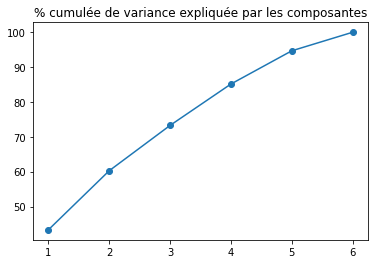

In [ ]:
#visualisation de % cumulée de variance expliquée par les composantes principales
plt.plot((np.arange(pca6.n_components_) + 1), np.cumsum(pca6.explained_variance_ratio_)*100, marker='o')
plt.title('% cumulée de variance expliquée par les composantes')
plt.show()

In [ ]:
#selection des deux premières composantes principales
pca = decomposition.PCA(n_components=2)
pca.fit(df_norm)

PCA(n_components=2)

- Variables

In [ ]:
#mesurer la contribution de chaque variables à chaque composantes (pour les 2 premières composantes)
pcs = pca.components_

- Représentation des variables et des index sur les deux premiers axes 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


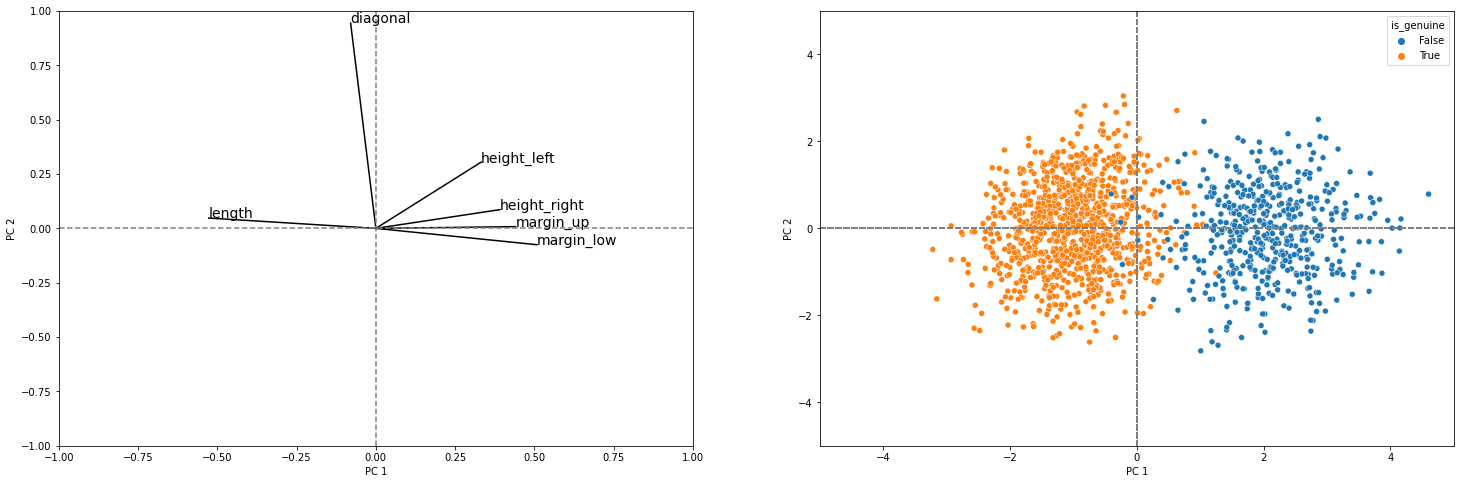

In [ ]:
fig = plt.figure(figsize=(25,8))

# I/ :  REPRENTATION DES VARIABLES

plt.subplot(1, 2, 1)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (df.columns[i]) de la performance
    plt.text(x, y, df_var_quanti.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


plt.xlim([-1, 1])
plt.ylim([-1, 1])

plt.xlabel('PC 1')
plt.ylabel('PC 2')


#II/ : REPRESENTATION DES DONNÉES

plt.subplot(1, 2, 2)

#(points)  projetés sur deux axes (les deux composantes principales)
df_projected = pca.transform(df_norm)
df_projected.shape

sns.scatterplot(df_projected[:, 0], df_projected[:, 1], hue=df['is_genuine'])

for i, (x,y) in enumerate(zip(df_projected[:, 0],
                       df_projected[:, 1])):
      
     #plt.text(x, y, df.index[i])

# Afficher une ligne horizontale y=0
     plt.plot([-5, 5], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
     plt.plot([0, 0], [-5, 5], color='grey', ls='--')

     plt.xlim([-5, 5])
     plt.ylim([-5, 5])


     plt.xlabel('PC 1')
     plt.ylabel('PC 2')

plt.show()

In [ ]:
#contribution de chaque variables à chaque composantes
pd.DataFrame(np.transpose(pca6.components_), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=df_var_quanti.columns)

,PC1,PC2,PC3,PC4,PC5,PC6
diagonal,-0.079681,0.944322,-0.278841,0.091509,-0.125277,0.009321
height_left,0.332256,0.304742,0.884166,0.005882,0.122267,0.002321
height_right,0.391421,0.086154,-0.200588,-0.867962,0.213695,0.010361
margin_low,0.508164,-0.075232,-0.089703,0.111584,-0.562097,0.632186
margin_up,0.440266,0.007901,-0.270441,0.439915,0.715237,0.166965
length,-0.527239,0.047376,0.138123,-0.179602,0.310120,0.756482


- Matrice des corrélations

In [ ]:
matrice = pd.DataFrame(df_norm, columns=df_var_quanti.columns, index=df_var_quanti.index)
matrice_corr = matrice.corr()

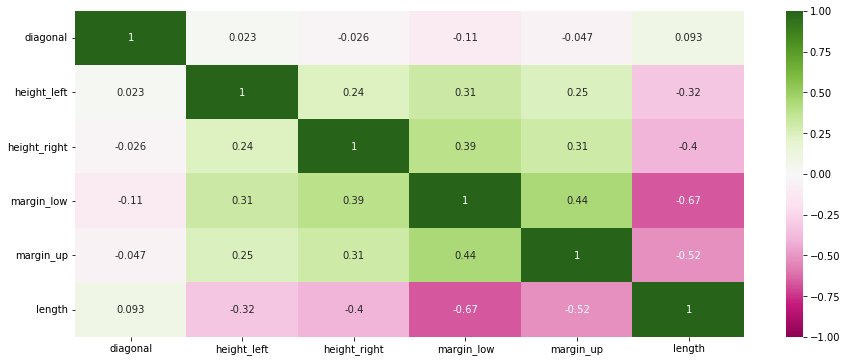

In [ ]:
#heatmap
fig = plt.figure(figsize=(15,6))
sns.heatmap(matrice.corr(), vmin=-1, vmax=1, annot=True, cmap='PiYG')
plt.show()

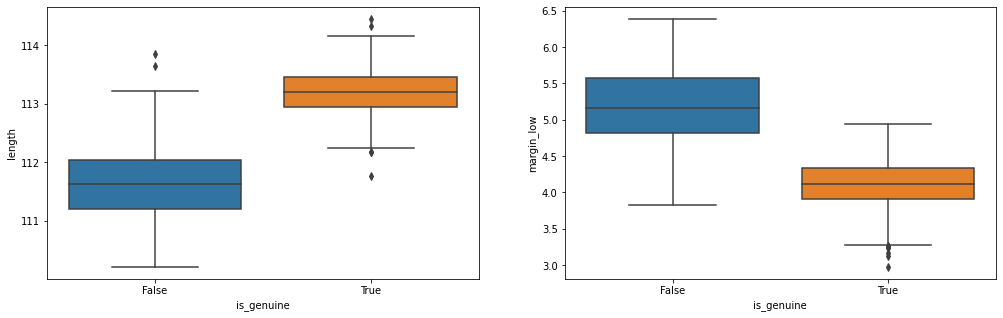

In [ ]:
#Les deux variables lenght et margin_low permettent de différencier les deux types de billets
fig, axes = plt.subplots(1, 2, figsize=(17,5))

sns.boxplot(x='is_genuine', y='length', data=df, ax=axes[0])
sns.boxplot(x='is_genuine', y='margin_low', data=df, ax=axes[1])

plt.show()

# CLASSIFICATION ET CLUSTERING

## I/ Séparation des données (training set, testing set)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [ ]:
X = df.drop('is_genuine', axis=1) #variables explicatives 
y = df.is_genuine #variable expliqué

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
len(X_train1), len(X_test1)  #train set composé de 1180 lignes, test set de 296 lignes

(1180, 296)

In [ ]:
y_train1

164      True
48       True
592      True
99       True
423      True
        ...  
719      True
912      True
1108    False
236      True
1072    False
Name: is_genuine, Length: 1180, dtype: bool

## II/ Régression Logistique

In [ ]:
from sklearn.linear_model import  LogisticRegression

#model de regression logistique
LR = LogisticRegression(solver='liblinear', multi_class='ovr')

#ajustement du modèle aux données d'entraînement
LR.fit(X_train1, y_train1)

#valeurs prédites de y_test à partir des variables explicatives du dataframe test soit : X_test1
y_LR_pred = LR.predict((X_test1))

## III/ Kmeans

In [ ]:
from sklearn.cluster import KMeans

# k-means clustering avec 2 clusters
kmeans = KMeans(init='random', n_clusters=2, n_init=1, random_state=1)

# association du clustering aux données
kmeans.fit(X_test1)

#predictions
y_kmeans_pred = kmeans.fit_predict(X_test1)

#centroides
centroides = kmeans.cluster_centers_

In [ ]:
np.unique(y_kmeans_pred, return_counts=True)

(array([0, 1], dtype=int32), array([194, 102]))

In [ ]:
#Création du dataframe TEST (avec X_test1 et y_test1)
TEST = X_test1.copy()
TEST['is_genuine']=y_test1
TEST.head(3)

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
578,172.53,103.80,103.82,4.64,3.28,113.54,True
392,171.79,103.87,103.95,4.54,3.01,112.45,True
832,171.80,104.30,103.58,4.75,3.00,112.94,True


In [ ]:
TEST.shape

(296, 7)

In [ ]:
#coordonées des centroïdes pour les clusters 0 et 1 du Kmeans
centroides

array([[172.01020619, 103.96716495, 103.83329897,   4.12953608,
          3.07979381, 113.1742268 ],
       [171.9072549 , 104.19196078, 104.14352941,   5.26764706,
          3.36088235, 111.63411765]])

In [ ]:
#coordonnées du "centroides" ou point moyen pour les vrais billets
TEST[TEST['is_genuine']==True].iloc[:,:-1].mean().to_numpy()

array([172.01147368, 103.96705263, 103.82615789,   4.12952632,
         3.07221053, 113.19110526])

In [ ]:
#coordonnées du "centroides" ou point moyen pour les faux billets
TEST[TEST['is_genuine']==False].iloc[:,:-1].mean().to_numpy()

array([171.90886792, 104.18367925, 104.14462264,   5.22471698,
         3.36386792, 111.66198113])

In [ ]:
TEST.columns

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length', 'is_genuine'],
      dtype='object')

In [ ]:
centroides

array([[172.01020619, 103.96716495, 103.83329897,   4.12953608,
          3.07979381, 113.1742268 ],
       [171.9072549 , 104.19196078, 104.14352941,   5.26764706,
          3.36088235, 111.63411765]])

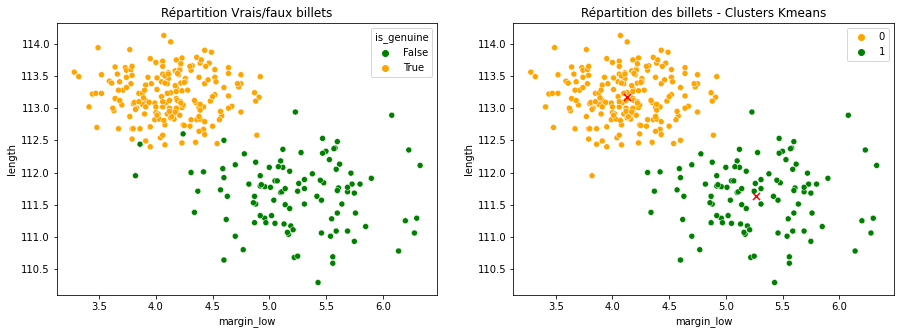

In [ ]:
#Représentation des clusters 0 et 1 du kmeans et des vrais/Faux billets 

fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.scatterplot(x=TEST.margin_low, y=TEST.length, hue=TEST.is_genuine, palette=['green','orange'], ax=axes[0]).set_title('Répartition Vrais/faux billets')

sns.scatterplot(x=TEST.margin_low, y=TEST.length, hue=kmeans.labels_, palette=['orange','green'], ax=axes[1]).set_title('Répartition des billets - Clusters Kmeans')

plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,5], 
            marker="x", c="r", s=50, label="centroids")

plt.show()

#la valeur True correspond bien au cluster 0 et la valeur False au cluster 1

In [ ]:
#les coordonnées des du centroide du cluster 0 est proche de celui des vrais billets 
#association du cluster 0 aux vrais billets et cluster 1 faux billets
y_kmeans_pred = pd.DataFrame(y_kmeans_pred, columns=['cluster']).replace({0: True, 1: False})
y_kmeans_pred

,cluster
0,True
1,True
2,True
3,True
4,True
...,...
291,True
292,False
293,False
294,True


## IV/ KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

- Selection du nombre de k 

In [ ]:
k_selection = []

for k in range(1,11) :
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train1, y_train1)
    knn_score = knn.score(X_test1, y_test1)
    k_selection.append(knn_score)

pd.DataFrame(k_selection,index=range(1,11), columns=['k'])


,k
1,0.986486
2,0.979730
3,0.989865
4,0.989865
5,0.989865
6,0.989865
7,0.986486
8,0.986486
9,0.989865
10,0.989865


- Modèle KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#model KNN
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
#ajustement du model aux données d'entraînement
knn.fit(X_train1, y_train1)
#valeurs prédites de y pour les données test
y_knn_pred = knn.predict(X_test1)

# ÉVALUATION DES MODELS

In [ ]:
#nombre de vrais et de faux billets dans dataset test 
y_test1.value_counts()

True     190
False    106
Name: is_genuine, dtype: int64

## I/ Matrice de Confusion

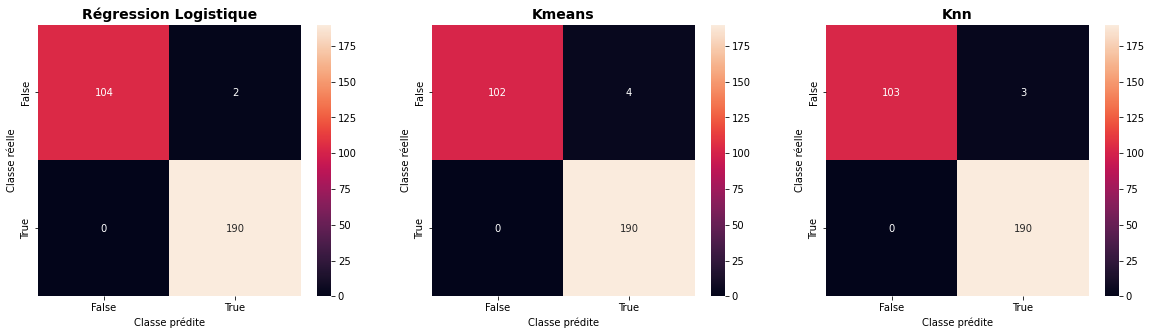

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

fig, axes = plt.subplots(1, 3, figsize=(20,5))

#matrice de confusion Régréssion logistique
cm_LR = confusion_matrix(y_test1, y_LR_pred)
sns.heatmap(cm_LR, annot=True, fmt='g', ax=axes[0]).set_title('Régression Logistique',fontsize=14, fontweight="bold")

#matrice de confusion KMeans
cm_kmeans = confusion_matrix(y_test1, y_kmeans_pred)
sns.heatmap(cm_kmeans, annot=True, fmt='g', ax=axes[1]).set_title('Kmeans',fontsize=14, fontweight="bold")

#matrice de confusion Knn
cm_knn = confusion_matrix(y_test1, y_knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='g', ax=axes[2]).set_title('Knn',fontsize=14, fontweight="bold")

for ax in axes:
    ax.set(xlabel='Classe prédite', ylabel='Classe réelle')
    ax.set(xticklabels=['False', 'True'], yticklabels=['False', 'True'])
    
plt.show()

## II/ Score Précision 

Score Précision (How often is the classifier correct (TP+TN)/total )

In [ ]:
#accuracy score Régression Logistique
print('Score précision Régression Logistique', round(accuracy_score(y_test1, y_LR_pred), 4)*100)

Score précision Régression Logistique 99.32


In [ ]:
#accuracy score Kmeans
print('Score précision Kmeans', round(accuracy_score(y_test1, y_kmeans_pred), 4)*100)

Score précision Kmeans 98.65


In [ ]:
#accuracy score Knn
print('Score précision knn', round(accuracy_score(y_test1, y_knn_pred), 4)*100)

Score précision knn 98.99


## III/ Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Régression Logistique
print('Régression Logistique')
print("")
print(classification_report(y_test1, y_LR_pred))

Régression Logistique

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       106
        True       0.99      1.00      0.99       190

    accuracy                           0.99       296
   macro avg       0.99      0.99      0.99       296
weighted avg       0.99      0.99      0.99       296



In [ ]:
#Kmeans
print('Kmeans')
print("")
print(classification_report(y_test1, y_kmeans_pred))

Kmeans

              precision    recall  f1-score   support

       False       1.00      0.96      0.98       106
        True       0.98      1.00      0.99       190

    accuracy                           0.99       296
   macro avg       0.99      0.98      0.99       296
weighted avg       0.99      0.99      0.99       296



In [ ]:
#Knn
print('Knn')
print("")
print(classification_report(y_test1, y_knn_pred))

Knn

              precision    recall  f1-score   support

       False       1.00      0.97      0.99       106
        True       0.98      1.00      0.99       190

    accuracy                           0.99       296
   macro avg       0.99      0.99      0.99       296
weighted avg       0.99      0.99      0.99       296



## IV/ ROC curve 

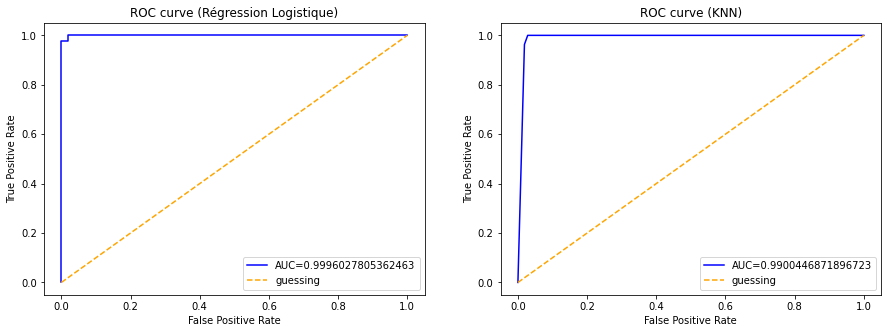

In [ ]:
from sklearn import metrics
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)

# metrics
y_pred_proba = LR.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test1,  y_pred_proba)
auc = metrics.roc_auc_score(y_test1, y_pred_proba)

# ROC curve
plt.plot(fpr,tpr, color='blue', label="AUC="+str(auc))
plt.plot([0,1], [0,1], color='orange', linestyle='--', label='guessing')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC curve (Régression Logistique)')

plt.subplot(1, 2, 2)

# metrics
y_pred_proba = knn.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test1,  y_pred_proba)
auc = metrics.roc_auc_score(y_test1, y_pred_proba)

# ROC curve
plt.plot(fpr,tpr, color='blue', label="AUC="+str(auc))
plt.plot([0,1], [0,1], color='orange', linestyle='--', label='guessing')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC curve (KNN)')
plt.show()
